实验内容

对GitHub上具有协作行为日志数据的500名用户的个人信息（包括姓名、公司、邮箱及其地理位置等）进行数据洞察分析。数据获取链接为：https://github.com/X-lab2017/dase-2024-autumn/tree/main/HomeWork/data/user_data

人口统计分析

国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。

城市级别分布：分析主要城市的开发者密度，发现技术热点区域。

时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。

协作行为分析

提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。

其他维度有趣的洞察（至少2个）



对于本次作业中的时区相关分析，数据集中的event_time表示的含义是该event发生时间，本身不表达用户的时区信息。如果想要获取用户的时区可以有如下两种思路：

分别是根据国家在数据集中自行补充其时区信息

根据其活跃时间推断其属于哪个时区。

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\873360823.py:4: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/users_combined_info_500_part_1.csv')


  user_id    name     location total_influence        country   event_type  \
0  663432  bdraco  Houston, TX     1776.967163  United States  CreateEvent   
1  663432  bdraco  Houston, TX     1776.967163  United States  CreateEvent   
2  663432  bdraco  Houston, TX     1776.967163  United States  CreateEvent   
3  663432  bdraco  Houston, TX     1776.967163  United States  CreateEvent   
4  663432  bdraco  Houston, TX     1776.967163  United States  CreateEvent   

  event_action                 event_time  
0        added  2024-11-26 20:28:37+08:00  
1        added  2024-11-26 20:42:57+08:00  
2        added  2024-11-27 04:10:46+08:00  
3        added  2024-11-27 17:43:50+08:00  
4        added  2024-11-27 19:56:34+08:00  
国家分布 (Top 10):
country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Canada             58600
Netherlands        52367
Czechia            48122
Japan              46553
Switzerland        

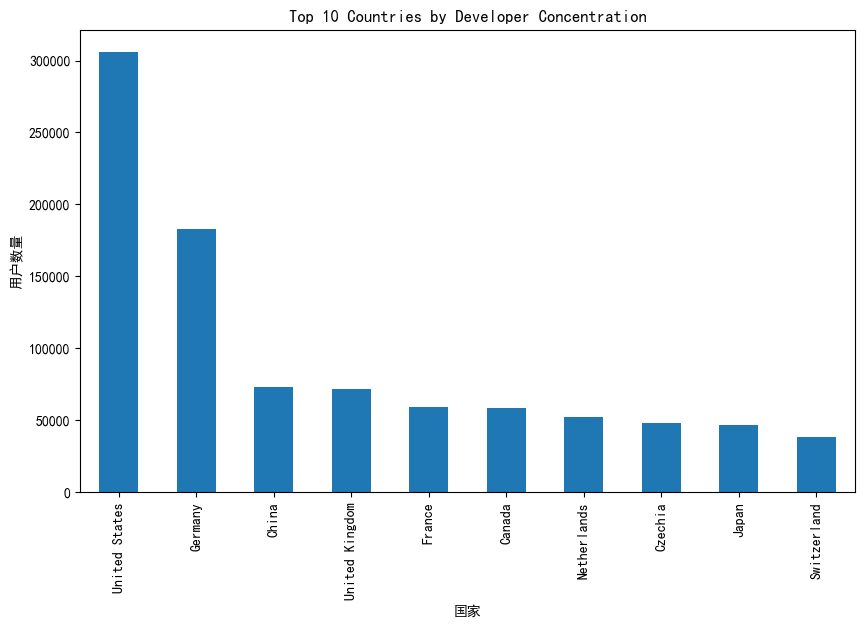

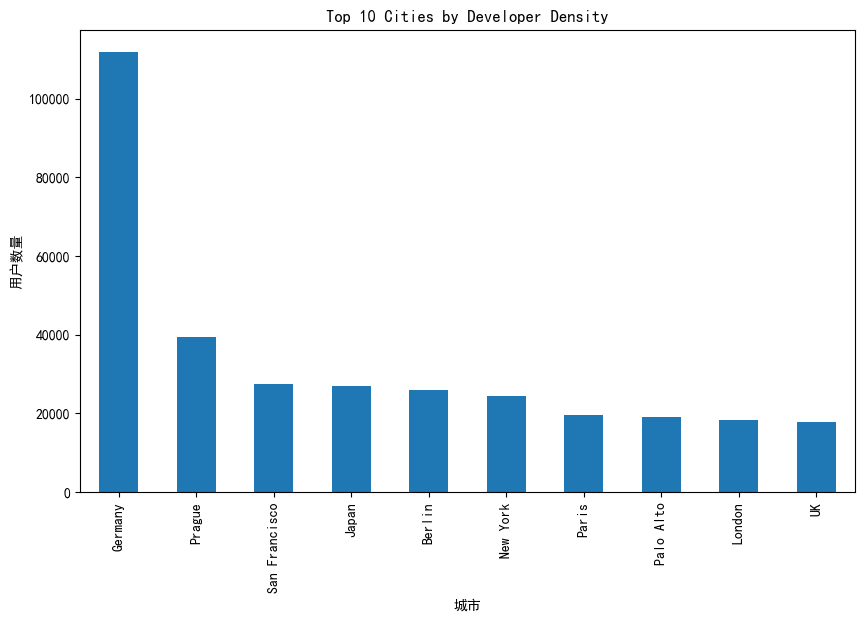

最活跃的用户 (Top 10):
      user_id  submission_count
239  11146458             35993
33     158862             14460
291  28706372              9160
498   8188402              8273
303  40306929              7836
308  43724913              4985
319  50149701              4617
377    140370              4118
431  30802565              3885
406  20182680              3539
高活跃用户:
      user_id  submission_count activity_level
239  11146458             35993           high
33     158862             14460           high
291  28706372              9160           high
498   8188402              8273           high
303  40306929              7836           high
低活跃用户:
      user_id  submission_count activity_level
236  10080325                21            low
438    370103                15            low
263  19261257                 8            low
99     985347                 5            low
496    814283                 2            low


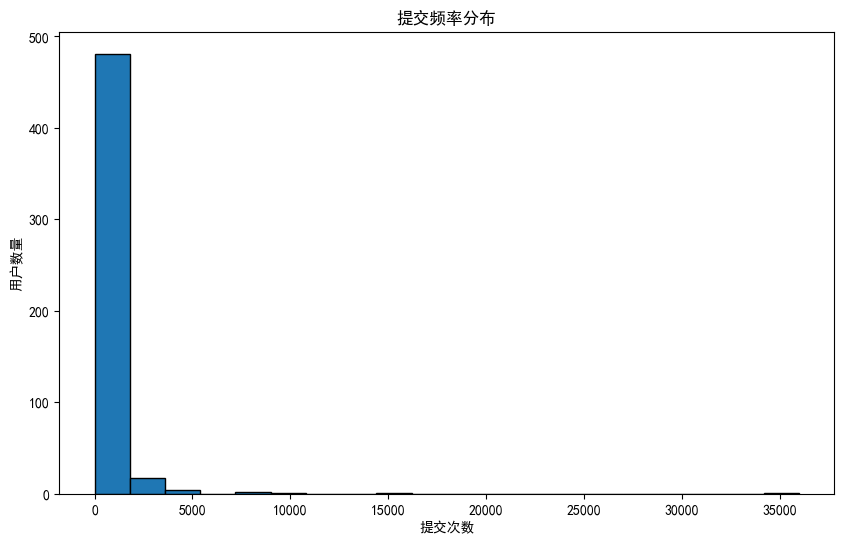

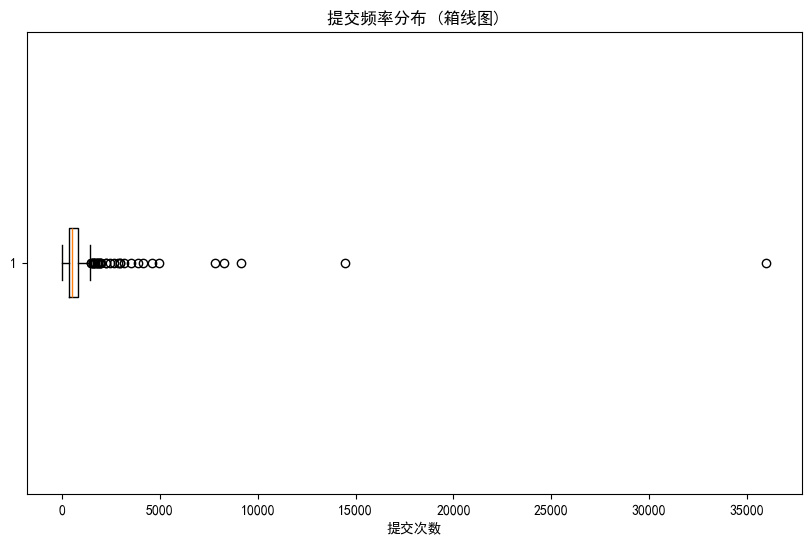

In [9]:
import pandas as pd

df = pd.read_csv('D:/users_combined_info_500_part_1.csv')

print(df.head())
country_distribution = df['country'].value_counts()

print("国家分布 (Top 10):")
print(country_distribution.head(10))
city_distribution = df[df['location'].notna()]['location'].str.split(',').str[0].value_counts()

print("城市分布 (Top 10):")
print(city_distribution.head(10))
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
country_distribution.head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Countries by Developer Concentration')
plt.xlabel('国家')
plt.ylabel('用户数量')
plt.show()

city_distribution.head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Cities by Developer Density')
plt.xlabel('城市')
plt.ylabel('用户数量')
plt.show()

submission_events = df[df['event_type'] == 'PushEvent']
submission_frequency = submission_events.groupby('user_id').size().reset_index(name='submission_count')

submission_frequency_sorted = submission_frequency.sort_values(by='submission_count', ascending=False)

print("最活跃的用户 (Top 10):")
print(submission_frequency_sorted.head(10))
high_active_threshold = submission_frequency_sorted['submission_count'].quantile(0.9)
low_active_threshold = submission_frequency_sorted['submission_count'].quantile(0.1)

submission_frequency_sorted['activity_level'] = 'medium'
submission_frequency_sorted.loc[submission_frequency_sorted['submission_count'] >= high_active_threshold, 'activity_level'] = 'high'
submission_frequency_sorted.loc[submission_frequency_sorted['submission_count'] <= low_active_threshold, 'activity_level'] = 'low'

print("高活跃用户:")
print(submission_frequency_sorted[submission_frequency_sorted['activity_level'] == 'high'].head())

print("低活跃用户:")
print(submission_frequency_sorted[submission_frequency_sorted['activity_level'] == 'low'].tail())
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(submission_frequency_sorted['submission_count'], bins=20, edgecolor='black')
plt.title('提交频率分布')
plt.xlabel('提交次数')
plt.ylabel('用户数量')
plt.show()
plt.figure(figsize=(10,6))
plt.boxplot(submission_frequency_sorted['submission_count'], vert=False)
plt.title('提交频率分布 (箱线图)')
plt.xlabel('提交次数')
plt.show()